In [4]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# example iris dataset
from sklearn.datasets import load_iris

dat = load_iris()
iris = pd.DataFrame(dat.data, columns=dat.feature_names)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
# k-means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(iris)
print(kmeans.labels_)
print(kmeans.cluster_centers_)
print(kmeans.inertia_)
print(kmeans.n_iter_)
print(f"number of centroids: {len(kmeans.cluster_centers_)}")

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
78.85144142614601
4
number of centroids: 3


/home/domyz/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


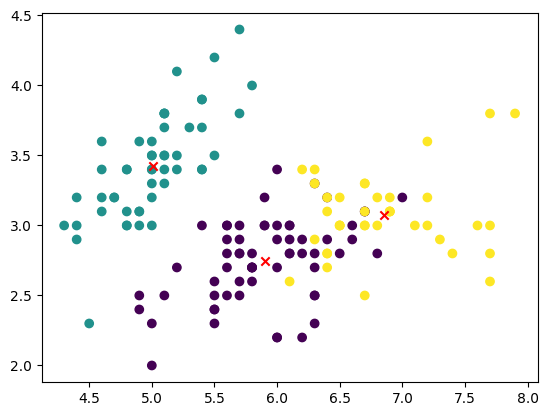

In [13]:
# plot the clusters
import matplotlib.pyplot as plt

plt.scatter(iris.iloc[:, 0], iris.iloc[:, 1], c=kmeans.labels_)
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="x", c="r"
)
plt.show()

In [15]:
# pca
pca = PCA(n_components=2)
pca.fit(iris)
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648]


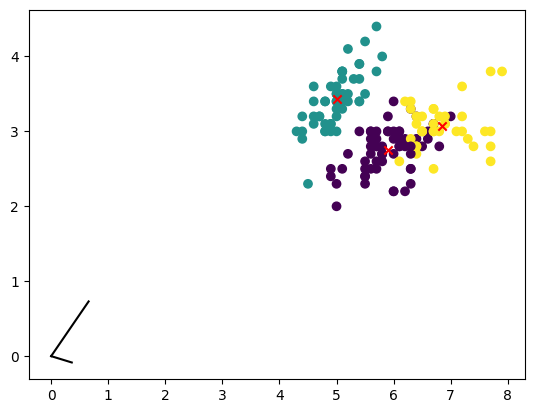

In [17]:
# plot pca vectors on top of the clusters
plt.scatter(iris.iloc[:, 0], iris.iloc[:, 1], c=kmeans.labels_)
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="x", c="r"
)
plt.plot([0, pca.components_[0, 0]], [0, pca.components_[0, 1]], "k-")
plt.plot([0, pca.components_[1, 0]], [0, pca.components_[1, 1]], "k-")
plt.show()